## Sales Analysis

#### Import Necessary Libraries.

In [1]:
import pandas as pd
import os
import glob

#### Merging of all 12 months data files into a single file.

In [14]:
# Firstly get the path of the directory where the files are stored.
path = 'Sales_Data'

# os library contains the path module with a join function used to join the path dynamically.
# glob is a library that has a module glob that reads the name of all the files present in that directory.
all_files = glob.glob(os.path.join(path, '*.csv'))
# print(all_files)

dataframe_list = []
for file in all_files:
    current_df = pd.read_csv(file)
    dataframe_list.append(current_df)
all_months_data = pd.concat(dataframe_list, ignore_index = True)

all_months_data.to_csv(r'C:\Users\Mohd Uzaif\Desktop\Data Science\Sales (Exploratory Data Analysis)\all_months_data.csv', index = False)

#### First look of Updated Data.

In [15]:
all_data = pd.read_csv('all_months_data.csv')
# all_data.shape
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


####  Clean up the given Data.

##### Drop rows of NaN.

In [16]:
# Find all rows containing the NaN values in NaN_df.
NaN_df = all_data[all_data.isna().any(axis=1)]

# Remove all the rows from the data frame that contain all NaN.
all_data = all_data.dropna(axis = 0, how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Find Or and delete it.

In [17]:
# Here we find all the rows that don't have the 'Or' at the start of the Order Date that we extract below.
all_data = all_data[all_data['Order Date'].str[0 : 2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Convert column to correct type.

In [18]:
# Firstly we need to convert the type of both column from string to int and float.
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])   #Make int.
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])        #Make float.

#### Augment Data with additional columns.

##### Add Column Month.

In [19]:
all_data['Month'] = all_data['Order Date'].str[0 : 2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add the Sales Column.

In [20]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add the city Column.

In [35]:
def get_city(address):
    splited_address = address.split(',')
    city = splited_address[1].strip()
    state = splited_address[2].split(' ')[1]
    return city + ' ' + state

all_data['City'] = all_data['Purchase Address'].apply(lambda address : get_city(address))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Best month for Sales? How much was earned that month?

In [75]:
# Now groupby is used to group all the same column and sum up the sales.
grouped_df = all_data.groupby('Month', as_index = False).sum()
# grouped_df

##### find the best month using bar plot.

###### Chart 1

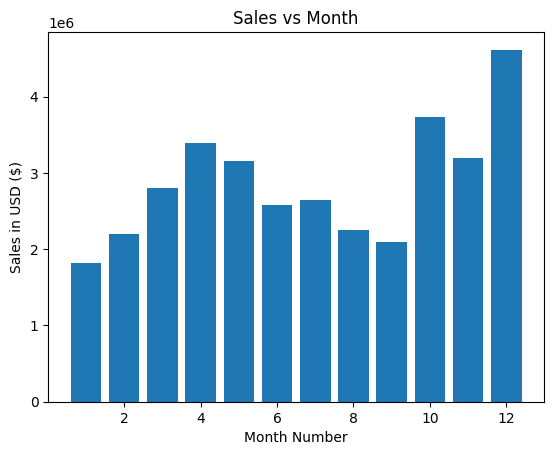

In [40]:
import matplotlib.pyplot as plt

plt.bar(grouped_df['Month'], grouped_df['Sales'])
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.title('Sales vs Month')

plt.show()

###### Why we are using the bar plot.

Bar plots are an excellent way to display categorical data like months, as they allow us to easily compare the values associated with each category.

###### What Insights We Aim to Find.

**Monthly Sales Comparison:** The bar plot will help us compare sales figures for each month side by side, making it easy to identify the relative performance of each month.
**Identify the Peak Sales Month:** We will be able to easily spot the month with the maximum sales by looking at the tallest bar in the plot.

#### What city had the highest number of sales.

In [36]:
grouped_city_df = all_data.groupby('City', as_index = False).sum()
grouped_city_df

,City,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,Atlanta GA,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
1,Austin TX,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
2,Boston MA,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
3,Dallas TX,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
4,Los Angeles CA,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
5,New York City NY,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
6,Portland ME,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
7,Portland OR,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
8,San Francisco CA,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91
9,Seattle WA,1765631765681765881766121766241766541766631766...,Bose SoundSport HeadphonesLightning Charging C...,16553,2733296.01,04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",104941,2747755.48


##### find the best City using bar plot.

###### Chart 2

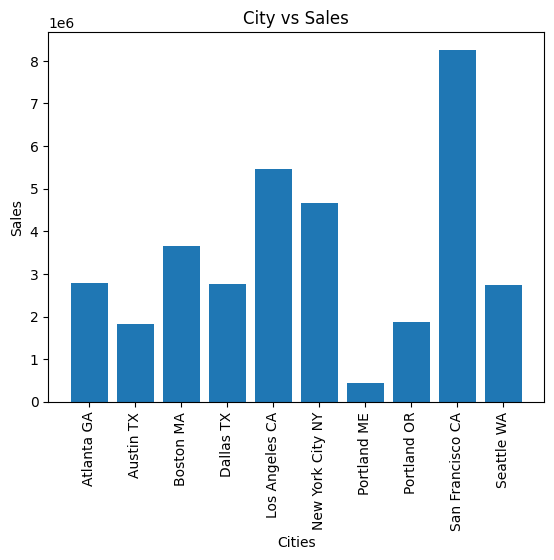

In [46]:
import matplotlib.pyplot as plt

plt.bar(grouped_city_df['City'], grouped_city_df['Sales'])
plt.xticks(rotation = 90)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('City vs Sales')

plt.show()

###### Why we are using the bar plot.

**Bar plots** are ideal for representing categorical data like cities, allowing for easy comparison of sales across different locations.

###### What Insights We Aim to Find.

**Sales Comparison by City:** The bar plot allows us to easily compare sales figures between cities, helping us understand which cities are driving the most revenue.

**Identify the City with the Highest Sales:** By looking at the tallest bar in the plot, we can quickly identify the city with the maximum sales, highlighting the best-performing location, Here we can see that .

#### Key Points:

1. NaN is a special floating-point value, and cannot be converted to any other type than float.
2. **Find the maximum and find relative index of maximum value:**
        Line 1. maximum_sale = grouped_df['Sales'].max()
        Line 2. max_sales_index = grouped_df['Sales'].idxmax()
        Line 3. maximum_sale_month = grouped_df.loc[max_sales_index, 'Month']